In [2]:
# import pandas as pd
# import os
# import glob
# import concurrent.futures
# import time

# directory = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice\\NAM 2023\\Month 3'
# directory2 = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice\\NAM 2023\\Month 3'
# cate_dir = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'
# cate_dir2 = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'

# # list of Excel files to read data from
# if os.path.exists(os.path.join(directory, '230301 Payment Summary - 2023-03-02T084245.428.xlsx')):
#     excel_files = glob.glob(os.path.join(directory, '*.xlsx'))
# else:
#     excel_files = glob.glob(os.path.join(directory2, '*.xlsx'))
# try:
#     # # use cols 0, Barcode; 2, Category Name
#     # df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,2])
#     # use cols 0, Barcode; 3, SubCategory Name
#     df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,3])
#     pass
# except FileNotFoundError:
#     # df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,2])
#     # use cols 0, Barcode; 3, SubCategory Name
#     df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,3])
#     pass
# # create an empty list to store the dataframes
# # dfs = [] sho

# outputfile =  'dataM1.csv'
# # def excel2csv
# def excel2csv(inputfile, outputfile):
    
#     # Check if exist file_path
#     if not os.path.exists(outputfile):
#         with open(outputfile, 'w') as f:
#             pass

#     # Read the first line of the file
#     with open(outputfile, 'r') as f:
#         first_line = f.readline().strip()
#     # Check if the first line contains the expected column names
#     has_headers = 'InvoiceID' in first_line
#     df = pd.read_excel(inputfile, sheet_name='Sheet2', skiprows=2, usecols=[4,7,8,14])
#     # df2 Category
#     # # merge with Category, on "Barcode"
#     # df = df.merge(df2, on='Barcode', how='left')
#     # merge with Sub Category, on "Barcode"
#     df = df.merge(df2, on='Barcode', how='left')
    
#     # Check if the first line contains the expected column names
#     df.to_csv(outputfile, mode='a', header= not has_headers, index=False)


# # loop through the list of Excel files
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     [executor.submit(excel2csv, file, outputfile) for file in excel_files]
#     # for file in excel_files:
#     #     executor.submit(excel2csv,file)

In [3]:
import pandas as pd

# Sample data
dtypes = {'InvoiceID': str, 'Barcode': str, 'Sum of Qty': str, 'Total Exclude VAT': str, 'SubCategory Name': str}
# df = pd.read_csv(r'C:\Users\minhtriet.pham\Desktop\New folder\Quantity\dataM1.csv', dtype=dtypes, on_bad_lines='warn')
try:
    df = pd.read_csv(r'C:\Users\trieu.pham\OneDrive - BTM Global Consulting\Projects\data csv\dataM1.csv', dtype=dtypes, on_bad_lines='warn')
except FileNotFoundError:
    df = pd.read_csv(r'C:\Users\Trieu Pham\OneDrive - BTM Global Consulting\Projects\data csv\dataM1.csv', dtype=dtypes, on_bad_lines='warn')
except:
    df = pd.read_csv(r'C:\Users\minhtriet.pham\Desktop\New folder\Quantity\dataM1.csv', dtype=dtypes, on_bad_lines='warn')

df['Sum of Qty'] = pd.to_numeric(df['Sum of Qty'], errors='coerce').fillna(0).astype(int)
df['Total Exclude VAT'] = pd.to_numeric(df['Total Exclude VAT'], errors='coerce').fillna(0).astype(float)
df['SubCategory Name'] = df['SubCategory Name'].astype(str)
# df['Category Name'] = df['Category Name'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377868 entries, 0 to 5377867
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   InvoiceID          object 
 1   Barcode            object 
 2   Sum of Qty         int32  
 3   Total Exclude VAT  float64
 4   SubCategory Name   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 184.6+ MB


In [4]:
# Filter InvoiceIDs where sum of Qty is 0 for all barcodes
invoice_ids_with_zero_qty = df.groupby('InvoiceID').filter(lambda x: x['Sum of Qty'].sum() == 0)['InvoiceID'].unique()

In [5]:
# Filter the original data frame based on the InvoiceIDs
df_filtered_invoice_id_zero_qty = df[df['InvoiceID'].isin(invoice_ids_with_zero_qty)]

df_filtered_invoice_id_zero_qty.sort_values(by=['InvoiceID', 'Barcode'])


,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
143238,InvoiceID,Barcode,0,0.0,SubCategory Name
407146,VN0001011201230219,2010101000005,0,0.0,Cup Of Ice
407147,VN0001011201230219,8934588233074,0,0.0,Energy Drinks Sub
407145,VN0001011201230219,8935023911137,0,0.0,Energy Drinks Sub
2363221,VN0001011501230059,2010104000118,0,0.0,Cold Local Drinks
...,...,...,...,...,...
4184653,VN0236012501230050,8935001816652,0,0.0,School Supplies
4138219,VN0236012901230021,8934563306847,0,0.0,Instant Noodles Pack
4138225,VN0236012901230024,8935049501527,0,0.0,No/Less Sugar CSD
4262117,VN0236013001230032,8935302600257,0,0.0,Raw material


In [6]:
df

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks
...,...,...,...,...,...
5377863,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks
5377864,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub
5377865,VN9996020102230159,8934588063053,1,6364.0,Purified water
5377866,VN9996020102230159,2270102000033,1,18182.0,Onigiri


In [7]:
# Find records in df that are not included in df_filtered_invoice_id_zero_qty
df_filtered = pd.merge(df, df_filtered_invoice_id_zero_qty, on=['InvoiceID', 'Barcode', 'Sum of Qty', 'Total Exclude VAT', 'SubCategory Name'], how='left', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'left_only'].drop('_merge', axis=1)
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks
...,...,...,...,...,...
5378603,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks
5378604,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub
5378605,VN9996020102230159,8934588063053,1,6364.0,Purified water
5378606,VN9996020102230159,2270102000033,1,18182.0,Onigiri


In [8]:
import pandas as pd
import numpy as np

# filter out rows where 'Sum of Qty' or 'Total Exclude VAT' are zero
# df_filtered = df[(df['Sum of Qty'] > 0) & (df['Total Exclude VAT'] > 0)]

group_by_invoice = df_filtered.dropna().groupby('InvoiceID').agg({'Barcode': lambda x: ', '.join(x.astype(str)), 
                                      'Sum of Qty': 'sum', 
                                      'Total Exclude VAT': 'sum', 
                                      'SubCategory Name': lambda x: ', '.join(x.astype(str))}).reset_index()
group_by_invoice

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,401230091,2702010000077,1,31818.0,Sandwich
1,VN0001010101230001,"8935049500544, 8935049500544",2,12962.0,"Mineral water, Mineral water"
2,VN0001010101230002,"8938512632025, 8938512632025",4,22224.0,"Purified water, Purified water"
3,VN0001010101230003,"8936011773416, 8936079121761, 8850453017528, 8...",10,212964.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil..."
4,VN0001010101230004,"8801100128845, 2010101000005, 2010805000295, 8...",12,348956.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub..."
...,...,...,...,...,...
2151455,VN9996023001230534,8935049510864,1,6364.0,Purified water
2151456,VN9996023001230535,"8935049501503, 8938500432835",2,27272.0,"Sugar CSD, Instant Sausage"
2151457,VN9996023001230536,"8935049501244, 8935049501534",2,21818.0,"Sports Drinks Sub, No/Less Sugar CSD"
2151458,VN9996023001230537,"8934588022111, 2010902000198, 2010101000005, 8...",7,87272.0,"Sugar CSD, Onigiri, Cup Of Ice, Salty Snacks, ..."


In [9]:
# filter group_by_invoice by upper_bound and lower_bound
upper_bound = 50000000
lower_bound = 1000

group_by_invoice_filtered = group_by_invoice[(group_by_invoice['Total Exclude VAT'] >= lower_bound) & (group_by_invoice['Total Exclude VAT'] <= upper_bound)]

group_by_invoice_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,401230091,2702010000077,1,31818.0,Sandwich
1,VN0001010101230001,"8935049500544, 8935049500544",2,12962.0,"Mineral water, Mineral water"
2,VN0001010101230002,"8938512632025, 8938512632025",4,22224.0,"Purified water, Purified water"
3,VN0001010101230003,"8936011773416, 8936079121761, 8850453017528, 8...",10,212964.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil..."
4,VN0001010101230004,"8801100128845, 2010101000005, 2010805000295, 8...",12,348956.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub..."
...,...,...,...,...,...
2151455,VN9996023001230534,8935049510864,1,6364.0,Purified water
2151456,VN9996023001230535,"8935049501503, 8938500432835",2,27272.0,"Sugar CSD, Instant Sausage"
2151457,VN9996023001230536,"8935049501244, 8935049501534",2,21818.0,"Sports Drinks Sub, No/Less Sugar CSD"
2151458,VN9996023001230537,"8934588022111, 2010902000198, 2010101000005, 8...",7,87272.0,"Sugar CSD, Onigiri, Cup Of Ice, Salty Snacks, ..."


In [12]:
import statistics
from scipy import stats
# Calculate the statistical measures using describe() method
stat = group_by_invoice_filtered.describe()

# Calculate the median and mode of the 'Total Exclude VAT' column
mean = statistics.mean(group_by_invoice_filtered['Total Exclude VAT'])
median = statistics.median(group_by_invoice_filtered['Total Exclude VAT'])
mode = group_by_invoice_filtered['Total Exclude VAT'].mode()[0]
std = statistics.stdev(group_by_invoice_filtered['Total Exclude VAT'])
Sum = group_by_invoice_filtered['Total Exclude VAT'].sum()
min_val = group_by_invoice_filtered['Total Exclude VAT'].min()
max_val = group_by_invoice_filtered['Total Exclude VAT'].max()
q1 = np.percentile(group_by_invoice_filtered['Total Exclude VAT'], 25)
q3 = np.percentile(group_by_invoice_filtered['Total Exclude VAT'], 75)
# Extract the desired values from the summary
mean1 = stat.loc['mean']
std1 = stat.loc['std']
min_val1 = stat.loc['min']
max_val1 = stat.loc['max']

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print ("Sum:", Sum)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)
print('Q1:', q1)
print('Q3:', q3)

# print("Mode of Total Exculde VAT", group_by_invoice['Total Exclude VAT'].mode()[0])

# Create a DataFrame with the calculated statistical measures 
summary_statistic_df = pd.DataFrame({'Mean': [mean],
                                     'Median': [median],
                                     'Mode': [mode],
                                     'Standard Deviation': [std],
                                     'Sum': [Sum],
                                     'Minimum Value': [min_val],
                                     'Maximum Value': [max_val]})

# Export the DataFrame to an Excel file
summary_statistic_df.to_excel('Summary Statistic M3.xlsx', index=False)

Mean: 56982.65250729512
Median: 32727.0
Mode: 10909.0
Standard Deviation: 103654.62161354334
Sum: 122594643944.99
Minimum Value: 1818.0
Maximum Value: 35754545.0
Q1: 17273.0
Q3: 63637.0


In [13]:
import numpy as np
import pandas as pd

# Update bins and labels for the new range concept
bins = np.concatenate(([0], np.arange(0, 16000, 16000), np.arange(16000, 30000, 14000), np.arange(30000, 53000, 23000), np.arange(53000, 350001, 297000), [np.inf]))
bins = np.unique(bins)  # Remove duplicate edges

# Update labels
labels = ['{} to {}' .format(i, i+15999) for i in range(0, 16000, 16000)] + ['{} to {}' .format(i, i+13999) for i in range(16000, 30000, 14000)] + ['{} to {}' .format(i, i+22999) for i in range(30000, 53000, 23000)] + ['{} to {}' .format(i, i+296999) for i in range(53000, 350000, 297000)]+ ['>=350000']

def grouped_data(df_filtered):
    df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)
    grouped_data = df_filtered.groupby('Basket Value')['Total Exclude VAT'].agg(['count','mean','median'])

    # Add a new column for Count x Mean
    grouped_data['Value'] = grouped_data['count'] * grouped_data['mean']

    # Update x-axis labels
    grouped_data.index = grouped_data.index.astype(str).str.replace(',', '')

    return grouped_data

grouped_data = grouped_data(group_by_invoice_filtered)

grouped_data


C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_8056\4080666542.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)


,count,mean,median,Value
Basket Value,,,,
0 to 15999,476329,10368.454942,10909.0,4.938796e+09
16000 to 29999,533882,22507.758035,21819.0,1.201649e+10
30000 to 52999,480191,40244.369397,39091.0,1.932498e+10
53000 to 349999,632434,110949.086972,89091.0,7.016797e+10
>=350000,28602,564520.048983,464545.0,1.614640e+10


c:\Users\Trieu Pham\anaconda3\envs\python311\Lib\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


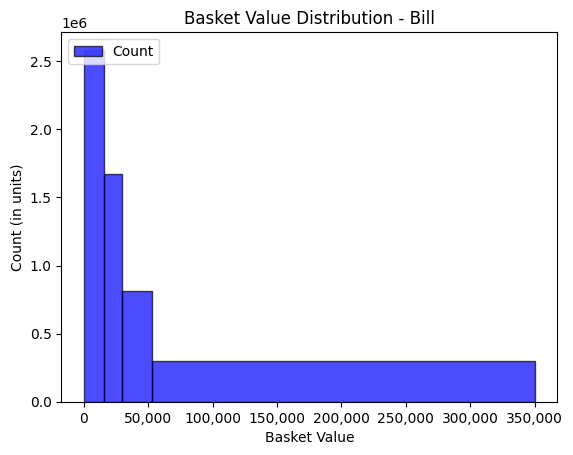

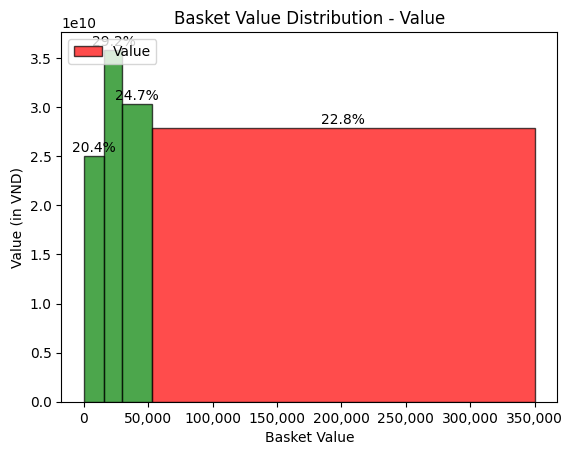

                   Count     Mean   Median         Value  %Value in total
Basket Value                                                             
0 to 15999       476,329   10,368   10,909  4.938796e+09         4.028558
16000 to 29999   533,882   22,508   21,819  1.201649e+10         9.801804
30000 to 52999   480,191   40,244   39,091  1.932498e+10        15.763318
53000 to 349999  632,434  110,949   89,091  7.016797e+10        57.235759
>=350000          28,602  564,520  464,545  1.614640e+10        13.170561


In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Calculate total value
total_value = grouped_data['Value'].sum()

# Add a new column for %Value in total
grouped_data['%Value in total'] = grouped_data['Value'] / total_value * 100

# Plot histogram for count
fig, ax1 = plt.subplots()
n, bins, patches = ax1.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Basket Value')
ax1.set_ylabel('Count (in units)')
ax1.set_title('Basket Value Distribution - Bill')
ax1.legend(['Count'], loc='upper left')
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Plot histogram for value
fig, ax2 = plt.subplots()
n2, bins2, patches2 = ax2.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='red', edgecolor='black', weights=df_filtered['Total Exclude VAT'])
ax2.set_xlabel('Basket Value')
ax2.set_ylabel('Value (in VND)')
ax2.set_title('Basket Value Distribution - Value')
ax2.legend(['Value'], loc='upper left')
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Add percentage value labels to the top of each column
for i in range(len(patches2)):
    height = patches2[i].get_height()
    percentage = height / total_value * 100
    ax2.annotate(f'{percentage:.1f}%', xy=(patches2[i].get_x() + patches2[i].get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center')

# Highlight columns with cumulative %Value in total up to 80%
cumulative_percentage = 0
for i, patch in enumerate(patches2):
    cumulative_percentage += grouped_data['%Value in total'].iloc[i]
    if cumulative_percentage <= 80:
        patch.set_fc('green')
    else:
        patch.set_fc('red')

plt.show()

# Display grouped data with additional column
grouped_data['Count'] = grouped_data['count'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Mean'] = grouped_data['mean'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Median'] = grouped_data['median'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Count x Mean'] = grouped_data['Value'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data = grouped_data[['Count', 'Mean', 'Median', 'Value', '%Value in total']]
print(grouped_data)

In [15]:
grouped_data.to_csv('groupdataM1.csv')

In [16]:
# Apply string slicing to create new columns 'StorID' and 'BusinessDate'
group_by_invoice_filtered['StoreID'] = group_by_invoice_filtered['InvoiceID'].map(lambda x: x[:6])
group_by_invoice_filtered['BusinessDate'] = group_by_invoice_filtered['InvoiceID'].map(lambda x: x[8:14])

# Reorder the columns
group_by_invoice_filtered = group_by_invoice_filtered.reindex (columns=['InvoiceID','StoreID','BusinessDate','Barcode','Sum of Qty','Total Exclude VAT','SubCategory Name'])

# Show the first 5 rows
group_by_invoice_filtered.head(5)

C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_8056\4178495343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_by_invoice_filtered['StoreID'] = group_by_invoice_filtered['InvoiceID'].map(lambda x: x[:6])
C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_8056\4178495343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_by_invoice_filtered['BusinessDate'] = group_by_invoice_filtered['InvoiceID'].map(lambda x: x[8:14])


,InvoiceID,StoreID,BusinessDate,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,401230091,401230,1,2702010000077,1,31818.0,Sandwich
1,VN0001010101230001,VN0001,010123,"8935049500544, 8935049500544",2,12962.0,"Mineral water, Mineral water"
2,VN0001010101230002,VN0001,010123,"8938512632025, 8938512632025",4,22224.0,"Purified water, Purified water"
3,VN0001010101230003,VN0001,010123,"8936011773416, 8936079121761, 8850453017528, 8...",10,212964.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil..."
4,VN0001010101230004,VN0001,010123,"8801100128845, 2010101000005, 2010805000295, 8...",12,348956.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub..."


In [17]:
# Group by StoreID and aggregate by 'InvoiceID', 'Total Exclude VAT', 'Sum of Qty' and 'BusinessDate'

grouped_by_store_net = group_by_invoice_filtered.groupby('StoreID').agg({'InvoiceID': 'nunique','Total Exclude VAT': 'sum', 'Sum of Qty': 'sum', 'BusinessDate': 'nunique'})

# Calculate the ADS, ADQ and ASI

grouped_by_store_net['ADS'] = grouped_by_store_net['Total Exclude VAT'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net['ADQ'] = grouped_by_store_net['Sum of Qty'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net['ASI'] = grouped_by_store_net['Total Exclude VAT'] / grouped_by_store_net['Sum of Qty']
grouped_by_store_net['CUS'] = grouped_by_store_net['InvoiceID'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net['BV'] = grouped_by_store_net['ADS'] / grouped_by_store_net['CUS']
grouped_by_store_net['Avg_Items_Per_Bill'] = grouped_by_store_net['ADQ'] / grouped_by_store_net['CUS']

# Reset the index to make 'StoreID' a regular column

grouped_by_store_net = grouped_by_store_net.reset_index()

grouped_by_store_net



,StoreID,InvoiceID,Total Exclude VAT,Sum of Qty,BusinessDate,ADS,ADQ,ASI,CUS,BV,Avg_Items_Per_Bill
0,401230,1,3.181800e+04,1,1,3.181800e+04,1.000000,31818.000000,1.000000,31818.000000,1.000000
1,VN0001,16547,7.389153e+08,44420,31,2.383598e+07,1432.903226,16634.743021,533.774194,44655.543905,2.684475
2,VN0002,17250,1.011246e+09,48229,31,3.262083e+07,1555.774194,20967.583549,556.451613,58622.932580,2.795884
3,VN0003,16965,9.517787e+08,52034,31,3.070254e+07,1678.516129,18291.477438,547.258065,56102.489655,3.067138
4,VN0004,13942,5.002319e+08,32005,17,2.942541e+07,1882.647059,15629.806249,820.117647,35879.497131,2.295582
...,...,...,...,...,...,...,...,...,...,...,...
207,VN0233,4858,2.821556e+08,15123,31,9.101794e+06,487.838710,18657.383720,156.709677,58080.612186,3.113009
208,VN0234,8014,3.809383e+08,21778,31,1.228833e+07,702.516129,17491.885251,258.516129,47534.099950,2.717494
209,VN0235,9331,4.428927e+08,25542,31,1.428686e+07,823.935484,17339.783416,301.000000,47464.660594,2.737327
210,VN0236,8787,5.454090e+08,28910,31,1.759384e+07,932.580645,18865.755898,283.451613,62069.990099,3.290088


In [18]:
# Create a new column 'Basket Value' based on the column 'Total Exclude VAT'
group_by_invoice_filtered['Basket Value'] = pd.cut(group_by_invoice_filtered['Total Exclude VAT'], bins=bins, labels=labels)

# Create a new dataframe 'group_basket_store' = group_by_invoice_filtered
group_basket_store = group_by_invoice_filtered

# Apply string slicing to create new column 'StoreID'
group_basket_store['StoreID'] = group_basket_store['InvoiceID'].map(lambda x: x[:6])

# Keep only the columns 'InvoiceID', 'Sum of Qty', 'Total Exclude VAT', 'Basket Value' and 'StoreID'
group_basket_store = group_basket_store[['InvoiceID','Sum of Qty','Total Exclude VAT','Basket Value','StoreID']].reindex(columns=['Basket Value','StoreID','InvoiceID','Sum of Qty','Total Exclude VAT'])

# Group by 'Basket Value' and 'StoreID' and aggregate by 'Total Exclude VAT'
group_basket_store = group_basket_store.groupby(['Basket Value','StoreID']).agg({'Total Exclude VAT': ['count', 'mean', 'median']})

# Access columns using tuple indexing and compute 'Value' column
group_basket_store.loc[:, ('Total Exclude VAT','Value')] = group_basket_store[('Total Exclude VAT','count')] * group_basket_store[('Total Exclude VAT','mean')]

group_basket_store.reset_index(inplace=True)

group_basket_store

Basket Value StoreID Total Exclude VAT                            
                                      count           mean    median   
0      0 to 15999  401230                 0            NaN       NaN  \
1      0 to 15999  VN0001              4505   10719.877691   10909.0   
2      0 to 15999  VN0002              3714   10859.260366   10909.0   
3      0 to 15999  VN0003              3820   10264.945026   10909.0   
4      0 to 15999  VN0004              3522   10874.224304   10909.0   
...           ...     ...               ...            ...       ...   
1055     >=350000  VN0233                56  579042.678571  507725.5   
1056     >=350000  VN0234                55  548098.890909  451818.0   
1057     >=350000  VN0235                72  554231.819444  455456.0   
1058     >=350000  VN0236               115  525003.539130  456363.0   
1059     >=350000  VN9996                 5  498545.000000  485454.0   

                  
           Value  
0            NaN  
1     48293049.0  
2     40331293.0  
3     39212090.0  
4     38299018.0  
...          ...  
1055  32426390.0  
1056  30145439.0  
1057  39904691.0  
1058  60375407.0  
1059   2492725.0  

[1060 rows x 6 columns]

In [19]:
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks
...,...,...,...,...,...
5378603,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks
5378604,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub
5378605,VN9996020102230159,8934588063053,1,6364.0,Purified water
5378606,VN9996020102230159,2270102000033,1,18182.0,Onigiri


In [21]:
try:
    df_read_cate = pd.read_excel(r'C:\Users\trieu.pham\OneDrive - BTM Global Consulting\Projects\github\python\Python\Data Analysis\DataCate.xlsx', sheet_name='Sheet1', usecols=[0,2])
except:
    df_read_cate = pd.read_excel(r'C:\Users\Trieu Pham\OneDrive - BTM Global Consulting\Projects\github\python\Python\Data Analysis\DataCate.xlsx', sheet_name='Sheet1', usecols=[0,2])
df_read_cate['Barcode'] = df_read_cate['Barcode'].astype(str)
df_filtered = pd.merge(df_filtered, df_read_cate, on='Barcode', how='left')

df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,Category Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD,Carbonated Drinks - CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks,Snacks for Drinks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks,Non-potato Chips
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack,Chocolate
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks,Non-potato Chips
...,...,...,...,...,...,...
5372951,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks,Non-potato Chips
5372952,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub,Energy Drinks
5372953,VN9996020102230159,8934588063053,1,6364.0,Purified water,Bottled Water
5372954,VN9996020102230159,2270102000033,1,18182.0,Onigiri,Rice Offsite


In [75]:
group_basket_cate_subcate = df_filtered

# filter group_basket_cate_subcate by upper_bound and lower_bound
upper_bound = 50000000
lower_bound = 1000
group_basket_cate_subcate = group_basket_cate_subcate[(group_basket_cate_subcate['Total Exclude VAT'] < upper_bound) & (group_basket_cate_subcate['Total Exclude VAT'] > lower_bound)]
group_basket_cate_subcate['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)

group_basket_cate_subcate.to_csv('group_basket_cate.csv')
group_basket_cate_subcate

C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_8056\3530586285.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_basket_cate_subcate['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)


,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,Category Name,Basket Value,StoreID,BusinessDate


In [76]:
group_basket_cate_subcate

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,Category Name,Basket Value,StoreID,BusinessDate
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD,Carbonated Drinks - CSD,16000 to 29999,VN0001,020123
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks,Snacks for Drinks,0 to 15999,VN0001,020123
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks,Non-potato Chips,16000 to 29999,VN0001,020123
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack,Chocolate,16000 to 29999,VN0001,020123
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks,Non-potato Chips,0 to 15999,VN0001,020123
...,...,...,...,...,...,...,...,...,...
5372951,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks,Non-potato Chips,16000 to 29999,VN9996,010223
5372952,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub,Energy Drinks,30000 to 52999,VN9996,010223
5372953,VN9996020102230159,8934588063053,1,6364.0,Purified water,Bottled Water,0 to 15999,VN9996,010223
5372954,VN9996020102230159,2270102000033,1,18182.0,Onigiri,Rice Offsite,16000 to 29999,VN9996,010223


In [77]:
# Group by 'Basket Value' and aggregate to get the top 5 'Category Name' and top 10 'SubCategory Name'
top_category_names = group_basket_cate_subcate.groupby('Basket Value')['Category Name'].apply(lambda x: x.value_counts().head(5)).reset_index()
top_subcategory_names = group_basket_cate_subcate.groupby('Basket Value')['SubCategory Name'].apply(lambda x: x.value_counts().head(10)).reset_index()

## CATEGORY

# Group by 'Basket Value' and 'Category Name', and compute the sum of 'Total Exclude VAT'
total_exclude_vat_by_category = group_basket_cate_subcate.groupby(['Basket Value', 'Category Name'])['Total Exclude VAT'].sum().reset_index()

# Sort the result by 'Basket Value' and 'Total Exclude VAT' in descending order
total_exclude_vat_by_category = total_exclude_vat_by_category.sort_values(['Basket Value', 'Total Exclude VAT'], ascending=[True, False])

# Reset the index
total_exclude_vat_by_category = total_exclude_vat_by_category.reset_index(drop=True)

## SUBCATEGORY

# Group by 'Basket Value' and 'SubCategory Name', and compute the sum of 'Total Exclude VAT'
total_exclude_vat_by_subcategory = group_basket_cate_subcate.groupby(['Basket Value', 'SubCategory Name'])['Total Exclude VAT'].sum().reset_index()

# Sort the result by 'Basket Value' and 'Total Exclude VAT' in descending order
total_exclude_vat_by_subcategory = total_exclude_vat_by_subcategory.sort_values(['Basket Value', 'Total Exclude VAT'], ascending=[True, False])

# Reset the index
total_exclude_vat_by_subcategory = total_exclude_vat_by_subcategory.reset_index(drop=True)


In [84]:
queries = group_basket_cate_subcate[(group_basket_cate_subcate['Basket Value'] == '>=350000') & (group_basket_cate_subcate['Category Name'] == 'Raw Material & Packages')]

queries

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,Category Name,Basket Value,StoreID,BusinessDate


In [78]:
total_exclude_vat_by_category

,Basket Value,Category Name,Total Exclude VAT
0,0 to 15999,Bottled Water,2.510194e+09
1,0 to 15999,Tea,2.509337e+09
2,0 to 15999,Instant Noodles,2.201799e+09
3,0 to 15999,Carbonated Drinks - CSD,1.537225e+09
4,0 to 15999,Energy Drinks,1.221689e+09
...,...,...,...
415,>=350000,Raw Material & Packages,0.000000e+00
416,>=350000,Salad Cat,0.000000e+00
417,>=350000,Supplement,0.000000e+00
418,>=350000,Tofu,0.000000e+00


In [65]:
total_exclude_vat_by_category.to_csv('total_exclude_vat_by_category.csv')

In [66]:
total_exclude_vat_by_subcategory

,Basket Value,SubCategory Name,Total Exclude VAT
0,0 to 15999,Sugar Tea,2.384412e+09
1,0 to 15999,Purified water,1.439596e+09
2,0 to 15999,Energy Drinks Sub,1.221689e+09
3,0 to 15999,Salty Snacks,1.092537e+09
4,0 to 15999,Instant Noodles Cup,1.042574e+09
...,...,...,...
835,>=350000,Tofu Sub,0.000000e+00
836,>=350000,Vegetables Sub,0.000000e+00
837,>=350000,Vegetarian food,0.000000e+00
838,>=350000,Wafflers,0.000000e+00


In [50]:
top_subcategory_names.reset_index()

top_subcategory_names

,Basket Value,level_1,SubCategory Name
0,0 to 15999,Sugar Tea,233651
1,0 to 15999,Purified water,173080
2,0 to 15999,Salty Snacks,124051
3,0 to 15999,Cup Of Ice,121662
4,0 to 15999,Energy Drinks Sub,101699
5,0 to 15999,Sugar CSD,94039
6,0 to 15999,Packaged bakery,92796
7,0 to 15999,Instant Noodles Cup,89373
8,0 to 15999,Instant Noodles Pack,81051
9,0 to 15999,Mineral water,76759


In [51]:
import numpy as np
from sklearn.linear_model import RANSACRegressor

# StoreID and BusinessDate added to the filter dataframe
df_filtered['InvoiceID'] = df_filtered['InvoiceID'].astype(str)
df_filtered['StoreID'] = df_filtered['InvoiceID'].apply(lambda x: x[:6])
df_filtered['BusinessDate'] = df_filtered['InvoiceID'].apply(lambda x: x[8:14])

# Group by Basket Value and StoreID and calculate count and mean
grouped_data_store = df_filtered.groupby(['InvoiceID', 'StoreID']).agg({'InvoiceID': 'count', 'Total Exclude VAT': 'mean'})
grouped_data_store.rename(columns={'InvoiceID': 'count', 'Total Exclude VAT': 'mean'}, inplace=True)
grouped_data_store.reset_index(inplace=True)

# Calculate the 'value' column as the product of 'mean' and 'count'
grouped_data_store['Value'] = grouped_data_store['mean'] * grouped_data_store['count']

# Drop rows with NaN or 0 values in 'mean' or 'Value' columns
grouped_data_store.dropna(subset=['mean', 'Value'], inplace=True)
grouped_data_store = grouped_data_store[(grouped_data_store['mean'] != 0) & (grouped_data_store['Value'] != 0)]

# Fit RANSAC Regression model to 'Value' and 'mean' columns
X = grouped_data_store[['Value']].values
y = grouped_data_store['mean'].values

regressor = RANSACRegressor()
regressor.fit(X, y)

# Predict the mean values using the fitted model
y_pred = regressor.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Set a threshold for identifying outliers
threshold = 1.5 * np.median(np.abs(residuals))

# Identify outliers based on residuals
outliers = grouped_data_store[residuals > threshold]

# Remove outliers from the grouped_data_store DataFrame
grouped_data_store_clean = grouped_data_store[residuals <= threshold]

# Show the cleaned grouped data columns
print(grouped_data_store_clean)


                  InvoiceID StoreID  count          mean     Value
1        VN0001010101230001  VN0001      2   6481.000000   12962.0
2        VN0001010101230002  VN0001      2  11112.000000   22224.0
3        VN0001010101230003  VN0001     10  21296.400000  212964.0
4        VN0001010101230004  VN0001     12  29079.666667  348956.0
5        VN0001010101230005  VN0001      4  12037.000000   48148.0
...                     ...     ...    ...           ...       ...
2151455  VN9996023001230534  VN9996      1   6364.000000    6364.0
2151456  VN9996023001230535  VN9996      2  13636.000000   27272.0
2151457  VN9996023001230536  VN9996      2  10909.000000   21818.0
2151458  VN9996023001230537  VN9996      5  17454.400000   87272.0
2151459  VN9996023001230538  VN9996      2  11818.000000   23636.0

[1453879 rows x 5 columns]


In [52]:
import numpy as np

# Sort the 'grouped_data_store' DataFrame by the 'value' column in descending order
grouped_data_store.sort_values('Value', ascending=False, inplace=True)

# Calculate the cumulative sum of the 'value' column
grouped_data_store['cumulative_sum'] = grouped_data_store['Value'].cumsum()

# Calculate the cumulative distribution percentage
grouped_data_store['cumulative_percentage'] = grouped_data_store['cumulative_sum'] / grouped_data_store['Value'].sum()

# Filter rows where the cumulative percentage is less than or equal to 0.8
filtered_data = grouped_data_store[grouped_data_store['cumulative_percentage'] >= 0.8]

# Print the filtered results
print(filtered_data)

                  InvoiceID StoreID  count           mean     Value   
293034   VN0033020301230371  VN0033      3   12727.666667   38183.0  \
1769332  VN0193021901230042  VN0193      2   19091.500000   38183.0   
1561177  VN0173012201230228  VN0173      3   12727.666667   38183.0   
589098   VN0068021201230001  VN0068      3   12727.666667   38183.0   
1226884  VN0137012401230194  VN0137      3   12727.666667   38183.0   
...                     ...     ...    ...            ...       ...   
2117522  VN0234021801230060  VN0234      5       0.200000       1.0   
433228   VN0050021301230144  VN0050      3   -3636.000000  -10908.0   
115176   VN0009011301230001  VN0009      3  -10000.333333  -30001.0   
189264   VN0019021401230310  VN0019      1  -70000.000000  -70000.0   
185000   VN0019011201230001  VN0019      1 -110476.000000 -110476.0   

         cumulative_sum  cumulative_percentage  
293034     9.888189e+10               0.800000  
1769332    9.888193e+10               0.800001  
